# Clustering Pruebas Images 

In this notebook, we will analyse the ["Pruebas" plant images](https://drive.google.com/file/d/1g2gHE5vp7-FfWnFTiO29vMLemUFyvCSM/view?usp=sharing). This data set contians 378 usable images and the zipped folder has been stored in the above link. All the images are 2832X 4240 color images.
Author: pc2846@g.rit.edu


## Cleaning the Data:

The folder contained some random images that had to be removed for this project. The images are captured in a time lapse, therefore we decided to group the images manually into 9 folders. We assumed that this manual process will help us clean the data and have a base for comparing the model's performance with the human's performance.

## Importing Essential Libraries

ScikitLearn and TensorFlow are the major APIs being used for modeling.

In [2]:
import os
import numpy as np
import zipfile
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

## Importing Dataset 
Downloading the zipped folder of dataset into the google colab from the drive. Later unzipping the folder to access the folders inside the main directory. We see 9 folders created after cleaning the dataset. 

In [3]:
# Importing data
! gdown --id 1mnPOFsZ9_iBcYpObqhAfhobW-xeVbc9u

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1mnPOFsZ9_iBcYpObqhAfhobW-xeVbc9u
To: /content/train.zip
100% 1.62G/1.62G [00:30<00:00, 53.4MB/s]


In [4]:
# Unzip the archive
import zipfile
local_zip = './train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [5]:
import os
base_dir = 'train'
lst_folders = os.listdir(base_dir)
print("Contents of train directory:")
print(sorted(lst_folders))

Contents of train directory:
['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']


## Sanity Check Before Analysis
It is important to understand and check if all the images are accessible, we find 9 folders and some images stored in all of them. We count the number of images present in each of the folders so that we have a total number of files to work with.

In [6]:
# Sanity check
base_dir = 'train'
c1_dir = os.path.join(base_dir, 'c1')
c2_dir = os.path.join(base_dir, 'c2')
c3_dir = os.path.join(base_dir, 'c3')
c4_dir = os.path.join(base_dir, 'c4')
c5_dir = os.path.join(base_dir, 'c5')
c6_dir = os.path.join(base_dir, 'c6')
c7_dir = os.path.join(base_dir, 'c7')
c8_dir = os.path.join(base_dir, 'c8')
c9_dir = os.path.join(base_dir, 'c9')

# List of folders inside the train directory
lst_of_dirs = [c1_dir, c2_dir, c3_dir, c4_dir, c5_dir, c6_dir, c7_dir, c8_dir, c9_dir]

# Printing the number of files in each folder an the total number of images
sum_of_imgs = 0
for dir in lst_of_dirs:
  sum_of_imgs += len(os.listdir(dir))
  print('total training images in ' + dir + ':' , len(os.listdir(dir)))

print('\ntotal training images: ' + str(sum_of_imgs))
print()

# Printing few file names under each folder
print("File names in every folder: ")
for dir in lst_of_dirs:
  print(dir + ": " + str(os.listdir(dir)[:10]))

total training images in train/c1: 3
total training images in train/c2: 3
total training images in train/c3: 26
total training images in train/c4: 47
total training images in train/c5: 63
total training images in train/c6: 90
total training images in train/c7: 41
total training images in train/c8: 71
total training images in train/c9: 34

total training images: 378

File names in every folder: 
train/c1: ['DSC00001(1).JPG', 'DSC00005.JPG', 'DSC00004.JPG']
train/c2: ['DSC00001.JPG', 'DSC00002.JPG', 'DSC00003.JPG']
train/c3: ['DSC00019.JPG', 'DSC00017.JPG', 'DSC00020.JPG', 'DSC00006.JPG', 'DSC00026.JPG', 'DSC00014.JPG', 'DSC00009.JPG', 'DSC00007.JPG', 'DSC00015.JPG', 'DSC00005(1).JPG']
train/c4: ['DSC00067.JPG', 'DSC00045.JPG', 'DSC00059.JPG', 'DSC00039.JPG', 'DSC00058.JPG', 'DSC00052.JPG', 'DSC00035.JPG', 'DSC00066.JPG', 'DSC00064.JPG', 'DSC00043.JPG']
train/c5: ['DSC00130.JPG', 'DSC00109.JPG', 'DSC00116.JPG', 'DSC00124.JPG', 'DSC00104.JPG', 'DSC00122.JPG', 'DSC00140.JPG', 'DSC00101.JPG

## Analyzing the Images
Two images from each folder are displayed. We understand that a pattern exists where the brightness of the plants (bioluminescence) increases till a point and then starts to fall when the images are displayed in the captured order. 

train/c1/DSC00001(1).JPG


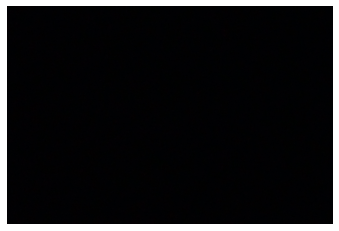

train/c1/DSC00004.JPG


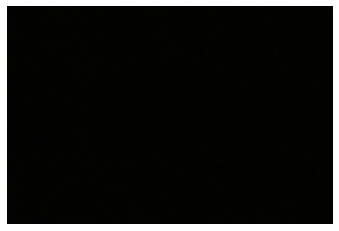

train/c2/DSC00001.JPG


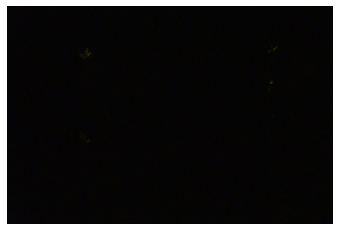

train/c2/DSC00002.JPG


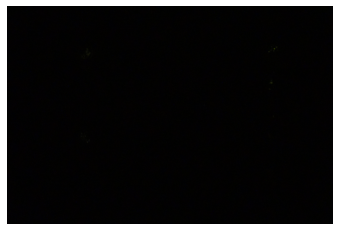

train/c3/DSC00005(1).JPG


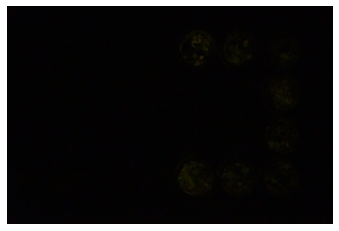

train/c3/DSC00006.JPG


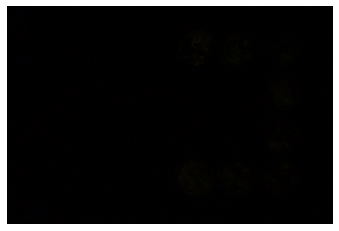

train/c4/DSC00031.JPG


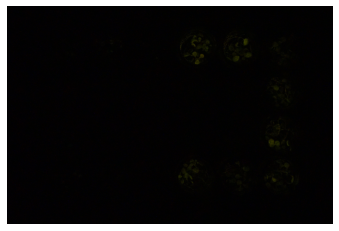

train/c4/DSC00032.JPG


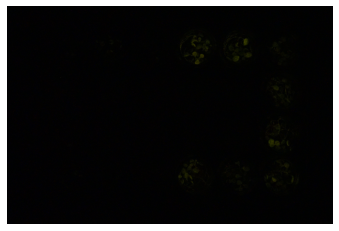

train/c5/DSC00078.JPG


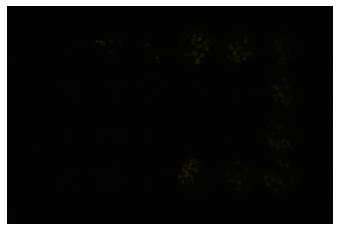

train/c5/DSC00079.JPG


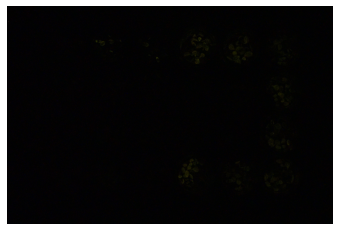

train/c6/DSC00141.JPG


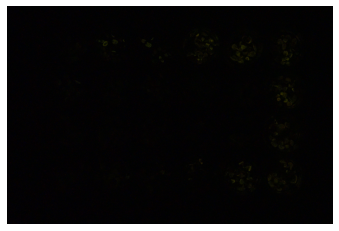

train/c6/DSC00142.JPG


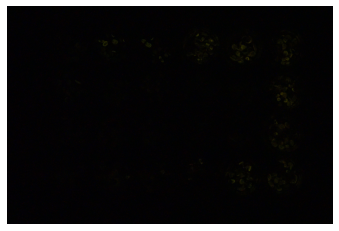

train/c7/DSC00231.JPG


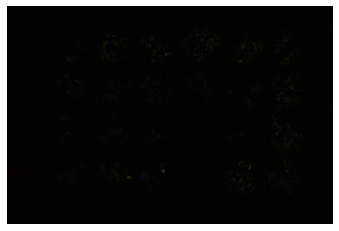

train/c7/DSC00232.JPG


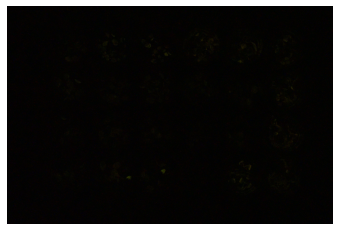

train/c8/DSC00270(2).JPG


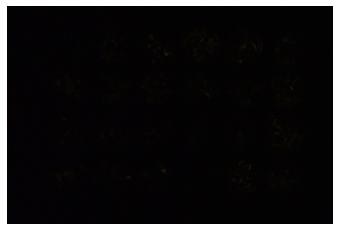

train/c8/DSC00271(2).JPG


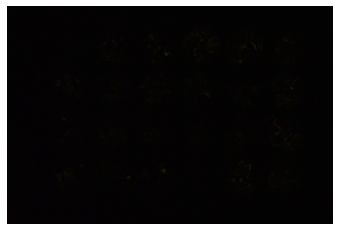

train/c9/DSC00340.JPG


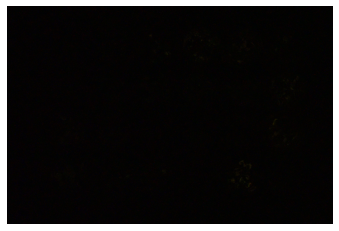

train/c9/DSC00341.JPG


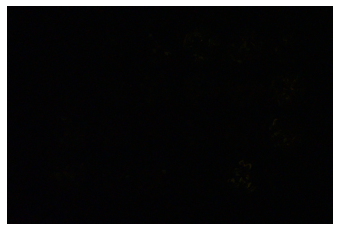

In [7]:
# Expectation: Since the images are time series, images from each foler must
# show us developement of plants in wells

# Utilities for displaying image to check the logic 
folder_file_dict = {}
for dir in lst_of_dirs:
  if dir not in folder_file_dict:
    name = dir[-2:] + '_files'
    folder_file_dict[name] = []

for k in folder_file_dict.keys():
  for dir in lst_of_dirs:
    if k[:2] == dir[-2:]:
      folder_file_dict[k].extend(os.listdir(dir))

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Sorted list of images
lst_of_cx_files = []
for v in folder_file_dict.values():
  lst_of_cx_files.append(sorted(v))

# List of 2 images 
pic_index = 2
display_lst = []
for cx_dir, cx_files in zip(lst_of_dirs, lst_of_cx_files):
  d = [os.path.join(cx_dir, fname) for fname in sorted(cx_files[pic_index-2:pic_index])]
  display_lst.append(d)

# List of images to be displayed
final_display = []
for d in display_lst:
  final_display += d

# Display each image
for i, img_path in enumerate(final_display):
  img = mpimg.imread(img_path)
  print(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

## Knowing the Size of Image
This step can help us understand our dataset better. We have to preprocess all the images into a size that is acceptable by the model that we will be using for feature extraction.

In [8]:
# Choosing a random image
import secrets
rand_sample_path = secrets.choice(final_display)
sample_image  = load_img(rand_sample_path)
# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)
print(f"Random image has a shape of: {sample_array.shape}")

# Check if all the images are of the same shape
all_paths = []
for cx_dir, cx_files in zip(lst_of_dirs, lst_of_cx_files):
  l = [os.path.join(cx_dir, fname) for fname in cx_files[:]]
  all_paths.append(l)

flat_lst_paths = [item for l in all_paths for item in l]
rnd_img_shape = sample_array.shape
cnt = 0
tot_imgs = len(flat_lst_paths)
for path in flat_lst_paths:
  _image  = load_img(path)
  _array = img_to_array(_image)
  if rnd_img_shape == _array.shape:
    cnt += 1
if cnt == tot_imgs:
  print("\nAll images are of the same size")

Random image has a shape of: (2832, 4240, 3)

All images are of the same size


## Data Preprocessing and Feature Extraction
The images in the raw form are of size 2832X4240 which is not acceptable by the VGG16 model. Therefore we resize the input images into 224X224 NumPy arrays. 

We will be using the VGG16 model as a feature extractor, this model takes in batches of images rather than a single one. Therefore we reshape the image as (1, 224, 224, 3). Below function takes one of our image and object of our instantiated model to preprocess the image and to return the features. The output layer of the VGG model is removed so that the new final layer is a fully-connected layer with 4,096 output nodes. This vector of 4,096 numbers is the feature vector that we will use to cluster the images.

In [83]:
# Importing the model and methods for transfer learning
from keras.applications.vgg16 import VGG16 
from keras.models import Model
from keras.applications.vgg16 import preprocess_input 

# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from image to numpy array
    img = img_to_array(img)
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

# The extracted features are stored in the HashMap otherwise stored in the 
# pickle file
all_images = flat_lst_paths
data = {}
p = r"/content/plant_features.pkl"

# loop through each image in the dataset
for image in all_images:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(image, model)
        data[image] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data, file)

1/1 [==============================] - 0s 16ms/step


In [84]:
# List of the filenames
filenames = np.array(list(data.keys()))
# List of just the features
feat = np.array(list(data.values()))
# Reshaping the features
print(feat.shape)
feat = feat.reshape(-1,4096)
print(feat.shape)

(378, 1, 4096)
(378, 4096)


## Dimensionality Reduction with PCA
Inorder to address the Curse of Dimensionality we use PCA to reduce the number of features from 4096 to a smaller number. We statistically analyse the features to pick a small number for the dimensionality reduction. Typically, we want the explained variance to be between 95–99% from the below graph we statistically find out that **50** or **25** components will be the best for reduction.

Variance preserved by 25 components: 0.964
Variance preserved by 50 components: 0.982
Variance preserved by 100 components: 0.993


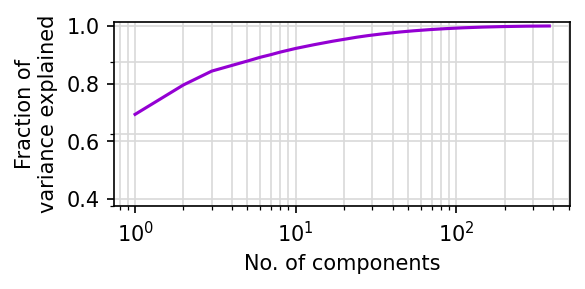

In [85]:
# Importing PCA from sklearn library
from sklearn.decomposition import PCA
pca_n = PCA(svd_solver='full')
x_pca_ = pca_n.fit_transform(feat)
var_ = pca_n.explained_variance_ratio_.cumsum()

# Plotting the fraction of variance explained vs. number of components 
fig, ax = plt.subplots(figsize=(4,2),dpi=150,)
ax.grid('on', which='both', color=np.ones(3)*0.85)
ax.plot(range(1,len(var_)+1), var_, color='darkviolet')
ax.set_xscale('log')
ax.set_xlabel('No. of components')
ax.set_ylabel('Fraction of\nvariance explained')
yt = np.linspace(1/4, 1, 4)
ytm = [np.mean([yt[i], yt[i+1]]) for i in range(len(yt)-1)]
ax.set_yticks(ytm, minor=True)
fig.tight_layout()

# Results
print('Variance preserved by 25 components: {:.3f}'.format(var_[25]))
print('Variance preserved by 50 components: {:.3f}'.format(var_[50]))
print('Variance preserved by 100 components: {:.3f}'.format(var_[100]))

In [127]:
pca = PCA(n_components=50, svd_solver='full', random_state=22)
pca.fit(feat)
x = pca.transform(feat)
print("Features of " + str(feat.shape[0]) + " images before dimensionality reduction with PCA: " + str(feat.shape[1]))
print("Features of " + str(x.shape[0]) + " images before dimensionality reduction with PCA: " + str(x.shape[1]))

Features of 378 images before dimensionality reduction with PCA: 4096
Features of 378 images before dimensionality reduction with PCA: 50


## KMeans Clustering
## Checking the number of clusters with Elbow method.
### Looks like 3 clusters is the best fit for this scenario.

Text(0, 0.5, 'Within-cluster Sum of Squares')

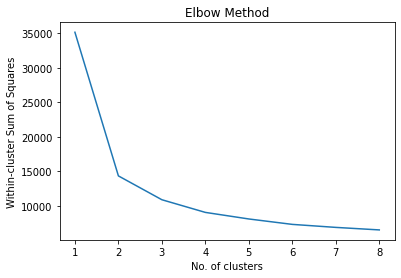

In [18]:
# Number of clusters of KMeans
from sklearn.cluster import KMeans
wcss = []
for i in range(1,9):
  kmeans = KMeans(i)
  kmeans.fit(feat)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

# Plotting the elbow 
no_clusters = range(1,9)
plt.plot(no_clusters, wcss)
plt.title('Elbow Method')
plt.xlabel("No. of clusters")
plt.ylabel("Within-cluster Sum of Squares")

## Generating Cluster IDs for all 378 images

In [95]:
kmeans = KMeans(n_clusters=3, random_state=22)
kmeans.fit(x)
labels = kmeans.labels_
print(str(len(np.unique(labels))) + " labels generated for " + str(len(labels)) + " images")
print("Unique ID's in generated labels: " + str(np.unique(labels)))

3 labels generated for 378 images
Unique ID's in generated labels: [0 1 2]


In [96]:
# Grouping all images and respective labels as key and value pairs
groups_imgs = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups_imgs.keys():
        groups_imgs[cluster] = []
        groups_imgs[cluster].append(file)
    else:
        groups_imgs[cluster].append(file)
print("Keys of each groups: " + str(groups_imgs.keys()))

Keys of each groups: dict_keys([1, 0, 2])


## Save K-Means model as pickle file

In [135]:
import pickle
pickle.dump(kmeans, open('kmeans_luciferase.pkl', 'wb'))
pickle.dump(pca, open('pca_luciferase.pkl', 'wb'))

## Testing model's prediction

In [137]:
kmeans_pkl = "kmeans_luciferase.pkl"
pca_pkl= "pca_luciferase.pkl"
pickled_kmeans = pickle.load(open(kmeans_pkl, 'rb'))
pickled_pca = pickle.load(open(pca_pkl, 'rb'))

# test_img_rotated = test_img_org.rotate(180)

/content/train/c4/DSC00044.JPG


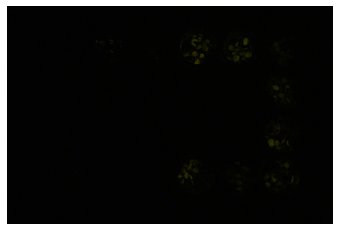

In [154]:
test_img_path = "/content/train/c4/DSC00044.JPG"
test_img = mpimg.imread(img_path)
print(img_path)
plt.imshow(img)
plt.axis('Off')
plt.show()

In [159]:
test_data = {}
test_img_feat = extract_features(test_img_path, model)
test_data[test_img_path] = test_img_feat
test_filename = np.array(list(test_data.keys()))
print("Test image file name: " + str(test_filename[0]))
print("Shape of test image: " + str(test_img_feat.shape))
reduced_test_feat = pca.transform(test_img_feat)
print("Shape of pca reduced test image: " + str(reduced_test_feat.shape))

1/1 [==============================] - 0s 17ms/step
Test image file name: /content/train/c4/DSC00044.JPG
Shape of test image: (1, 4096)
Shape of pca reduced test image: (1, 50)


In [160]:
# Prediction result
pickled_kmeans.predict(reduced_test_feat)

array([2], dtype=int32)